# Exploratory Data Analysis

##### Exploratory data analysis (EDA) is applied to analyze and investigate datasets and review their foremost characteristics, often operating data visualization methods. 


It is good to learn the data first and try to find various insights from it. EDA is all about addressing the sense of data in hand before getting them messy with it.

Here we will use the "World Happiness Report" as the dataset and perform Exploratory Data Analysis on it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = (12,6)
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Read the data using pandas

In [4]:
Happiness_Df = pd.read_csv("/content/drive/MyDrive/Explorary Data Analysis /Happyindex Explonatory_Data_Analysis-main/files/Happiness.csv")

#### Check the first few rows of the dataset

In [6]:
Happiness_Df.head(3)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204


#### Using shape, we can see that our dataset has 158 rows and 12 columns

In [7]:
Happiness_Df.shape

(158, 12)

#### info() method shows some of the characteristics of the data such as, Column Name, No. of non-null values of our columns, Dtype of the data and Memory Usage. 

#### From this we can observe, that the data which we have doesn't have any missing values. We are very lucky in this case, but in real life scenarios, the data usually has missing values which we need to handle for our model to work accurately.

In [8]:
Happiness_Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

#### describe() method shows basic statistical characteristics of each numerical feature (int64 and float64 types): number of non-missing values, mean, standard deviation, range, median, 0.25, 0.50, 0.75 quartiles.

In [9]:
Happiness_Df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


**Handling missing values in the dataset**. 
Luckily, this dataset doesn’t have any missing values, but the real world is not so naive as our case.

So I have removed a few values intentionally just to depict how to handle this particular case.

We can check if our data contains a null value or not by the following commandHandling missing values in the dataset. Luckily, this dataset doesn’t have any missing values, but the real world is not so naive as our case.

So I have removed a few values intentionally just to depict how to handle this particular case.

We can check if our data contains a null value or not by the following command


In [18]:
Happiness_Df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

As we can see that “Happiness Score” and “Freedom” features have 1 missing values each.

So, now we can handle the missing values by using a few techniques, which are

**Drop the missing values –** If the dataset is huge and missing values are very few then we can directly drop the values because it will not have much impact.
**Replace with mean values –** We can replace the missing values with mean values, but this is not advisable in case if the data has outliers.
**Replace with median values –** We can replace the missing values with median values, and it is recommended in case if the data has outliers.
**Replace with mode values –** We can do this in the case of a Categorical feature.
**Regression –** It can be used to predict the null value using other details from the dataset.
For our case, we will handle missing values by replacing them with the median value.

**happinessData.corr()** is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored.
The resulting coefficient is a value between -1 and 1 inclusive, where:
1: Total positive linear correlation.
0: No linear correlation, the two variables most likely do not affect each other.
-1: Total negative linear correlation.
Pearson Correlation is the default method of the function "corr".

In [19]:
Happyduplicate = Happiness_Df.duplicated().sum()
print(Happyduplicate)

0


In [20]:
#Happiness_Df.groupby(['Region', 'Country']).groups

{('Australia and New Zealand', 'Australia'): [9], ('Australia and New Zealand', 'New Zealand'): [8], ('Central and Eastern Europe', 'Albania'): [94], ('Central and Eastern Europe', 'Armenia'): [126], ('Central and Eastern Europe', 'Azerbaijan'): [79], ('Central and Eastern Europe', 'Belarus'): [58], ('Central and Eastern Europe', 'Bosnia and Herzegovina'): [95], ('Central and Eastern Europe', 'Bulgaria'): [133], ('Central and Eastern Europe', 'Croatia'): [61], ('Central and Eastern Europe', 'Czech Republic'): [30], ('Central and Eastern Europe', 'Estonia'): [72], ('Central and Eastern Europe', 'Georgia'): [129], ('Central and Eastern Europe', 'Hungary'): [103], ('Central and Eastern Europe', 'Kazakhstan'): [53], ('Central and Eastern Europe', 'Kosovo'): [68], ('Central and Eastern Europe', 'Kyrgyzstan'): [76], ('Central and Eastern Europe', 'Latvia'): [88], ('Central and Eastern Europe', 'Lithuania'): [55], ('Central and Eastern Europe', 'Macedonia'): [92], ('Central and Eastern Europe

In [21]:
Happiness_Df.groupby(['Region', 'Country']).mean()

Happiness Rank  ...  Dystopia Residual
Region                     Country                         ...                   
Australia and New Zealand  Australia                   10  ...            2.26646
                           New Zealand                  9  ...            2.26425
Central and Eastern Europe Albania                     95  ...            1.89894
                           Armenia                    127  ...            1.75873
                           Azerbaijan                  80  ...            2.00073
...                                                   ...  ...                ...
Western Europe             Portugal                    88  ...            1.26462
                           Spain                       36  ...            2.12367
                           Sweden                       8  ...            2.37119
                           Switzerland                  1  ...            2.51738
                           United Kingdom              21  ...            1.96994

[158 rows x 10 columns]

In [22]:
df= Happiness_Df.corr(method='spearman')

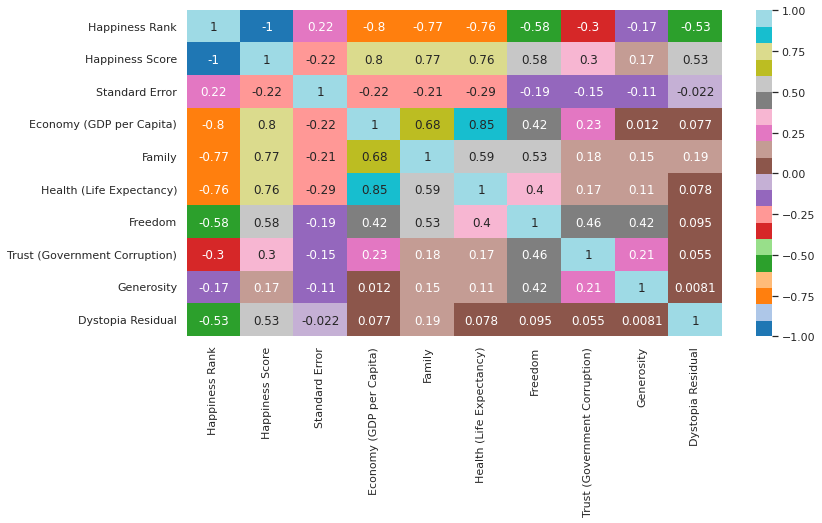

In [23]:
rcParams['figure.figsize'] = (12,6)
rcParams['font.size']=12
rcParams['lines.color'] = 'black'
rcParams['lines.linewidth']=0
sns.heatmap(df,annot=True, cmap='tab20')

#### As we can observe from the above heatmap of correlations that, there is a high correlation between
##### Happiness Score - Economy (GDP per Capita) = 0.78
##### Happiness Score - Family = 0.74
##### Happiness Score - Health (Life Expectancy) = 0.72
##### Economy (GDP per Capita) - Health (Life Expectancy) = 0.82

#### Now,using Seaborn, we visualize the relation between Economy (GDP per Capita) and Happiness Score by using a regression plot. And as we can see that, as Economy increases, the Happiness Score increases as well denoting a positive relation.

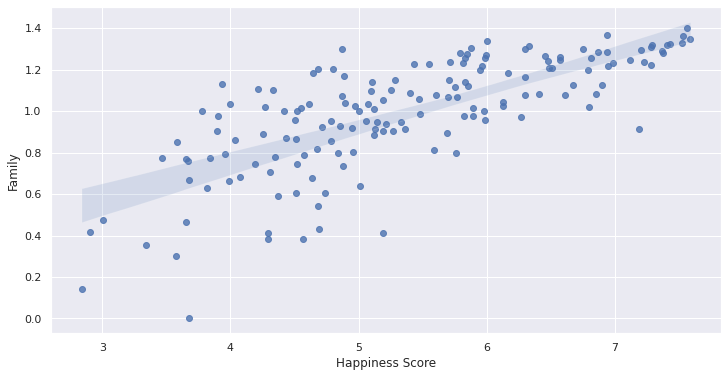

In [24]:
sns.regplot(x='Happiness Score', y= 'Family', data=Happiness_Df, dropna = True)

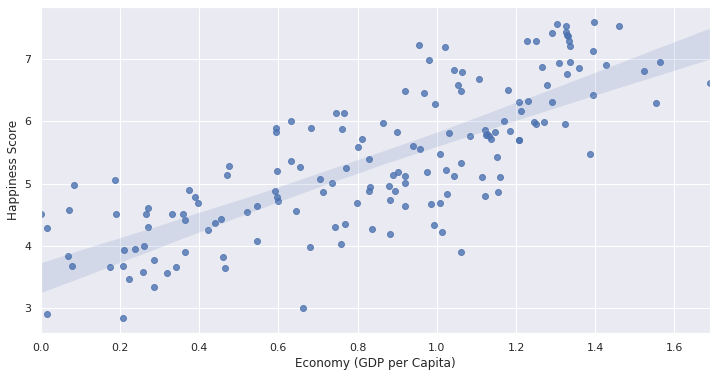

In [ ]:
sns.regplot(x='Economy (GDP per Capita)',y='Happiness Score',data=Happiness_Df)

#### Now,using Seaborn, we visualize the relation between Family and Happiness Score by using a regression plot.

<AxesSubplot:xlabel='Family', ylabel='Happiness Score'>

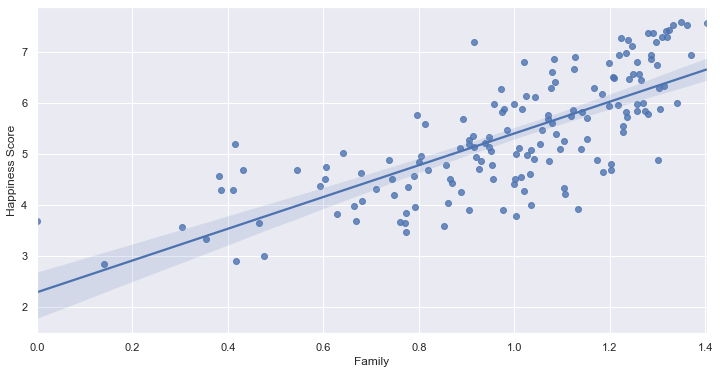

In [ ]:
sns.regplot(x='Family',y='Happiness Score',data=Happiness_Df)

#### Now,using Seaborn, we visualize the relation between Health (Life Expectancy) and Happiness Score by using a regression plot. And as we can see that, as Happiness is dependent on health,i.e. Good Health is equal to More Happiness.

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Happiness Score'>

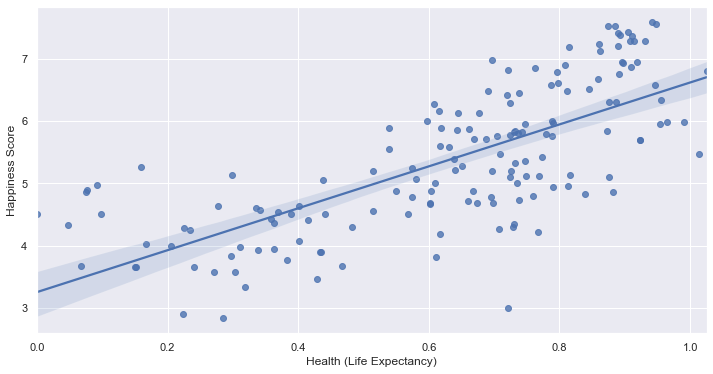

In [ ]:
sns.regplot(x='Health (Life Expectancy)',y='Happiness Score',data=Happiness_Df)

#### Now,using Seaborn, we visualize the relation between Freedom and Happiness Score by using a regression plot. And as we can see that, as the correlation is less between these two parameters so the graph is more scattered and the dependency is less between the two.

<AxesSubplot:xlabel='Freedom', ylabel='Happiness Score'>

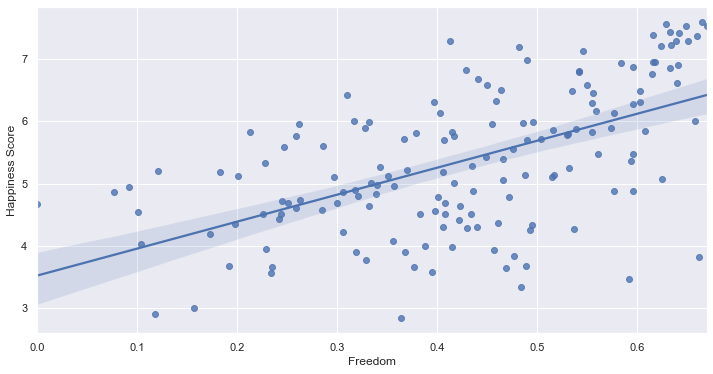

In [ ]:
sns.regplot(x='Freedom',y='Happiness Score',data=Happiness_Df)

#### Now,using Seaborn, we visualize the relation between Economy (GDP per Capita) and Health (Life Expectancy) by using a regression plot.

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Health (Life Expectancy)'>

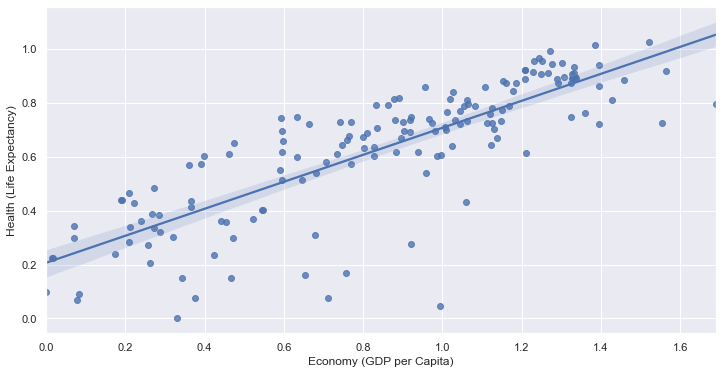

In [ ]:
sns.regplot(x='Economy (GDP per Capita)',y='Health (Life Expectancy)',data=Happiness_Df)

In [13]:
def plotPerColumnDistribution(Happiness_Df, nGraphShown, nGraphPerRow):
    nunique = Happiness_Df.nunique()
    Happiness_Df = Happiness_Df[[col for col in Happiness_Df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = Happiness_Df.shape
    columnNames = list(Happiness_Df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = Happiness_Df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

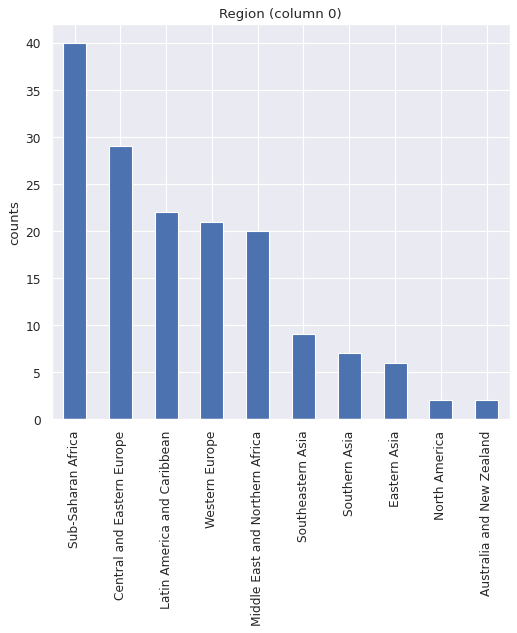

In [14]:
plotPerColumnDistribution(Happiness_Df, 10, 5)

### The End